In [1]:
#incidence_angle,track_angle,los_east,los_north,los_up

import numpy as np
import pandas as pd
from utils import *
asc_df = pd.read_csv("dane_pociete/ascLodz.csv", on_bad_lines='skip', sep=';', decimal=',',nrows=100)
dsc_df = pd.read_csv("dane_pociete/desc_Lodz.csv", on_bad_lines='skip', sep=';', decimal=',',nrows=100)

asc_cols = get_date_columns(asc_df.columns)
dsc_cols = get_date_columns(dsc_df.columns)
matching_dates = match_dates(asc_cols, dsc_cols, 6)

for idx, asc in asc_df.iterrows(): #dla kazdego wiersza w ASC
    dap = []
    dhald = []
    asc_tuple = (asc['latitude'], asc['longitude'])
    nn_idx = nearest_neighbour(asc_tuple, dsc_df[['pid', 'latitude', 'longitude']], 10)
    #nn_idx = find_by_radius(asc_tuple, dsc_df[['pid', 'latitude', 'longitude']], 0.0001)
    nn_points = dsc_df.iloc[nn_idx]
    for asc_date in matching_dates: #dla kazdej daty w jednym wierszu ASC
        dsc_dates = matching_dates[asc_date]#POLICZ WZOR
        print(nn_points[dsc_dates[0]].mean())
        w = wzor_pierwszy(asc[asc_date], nn_points[dsc_dates[0]].mean(), asc['incidence_'], nn_points['incidence_'].mean(), asc['track_angl'], nn_points['track_angl'].mean())
        #tutaj zamiast append mean to wzor podstawiamy
        dap.append(w[0])
        dhald.append(w[1])        
    save_to_csv(dap, ';')
    break
    
         
#TODO zrobic w obszaze znalezc wszystkie asc i dsc usrednic do pojedynczyhc wartosci i do wzoru
#TODO wszystkie dscc w promienu do asc


/home/uwm/EGMS/utils.py:5: SyntaxWarning: invalid escape sequence '\d'
  if re.fullmatch('\d{8}', strip):


0.8300000000000001
1.23
1.9499999999999997
1.1399999999999997
2.55
1.23
-1.3
0.010000000000000031
-0.9199999999999999
0.41000000000000003
-0.17999999999999994
-0.4800000000000001
-1.43
-2.42
0.30999999999999994
-0.5199999999999998
-2.1700000000000004
-3.17
-2.8999999999999995
-0.27000000000000013
-2.29
-1.9499999999999997
-0.96
-0.82
-1.6699999999999995
-1.0100000000000002
-0.36000000000000015
-4.0
-1.8800000000000001
-2.8000000000000003
-3.0100000000000002
-1.35
-1.89
-0.78
-1.0900000000000003
7.216449660063518e-17
0.5599999999999998
-1.9299999999999997
-1.27
-0.42000000000000004
0.5399999999999998
0.51
-0.43000000000000005
-1.5799999999999998
-1.24
1.4000000000000001
0.06999999999999992
0.27999999999999997
-0.07999999999999999
0.28000000000000014
-0.95
0.85
-0.5799999999999998
1.2099999999999997
-0.07000000000000002
-0.15999999999999998
-0.7799999999999999
0.76
-2.0499999999999994
-1.06
-0.9799999999999999
-1.16
0.59
-0.7999999999999998
-1.9
-1.18
-0.8300000000000001
0.3
-1.090000000

450


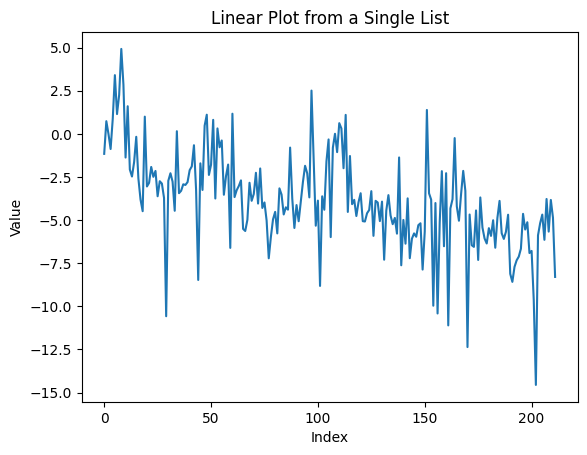

In [13]:
import matplotlib.pyplot as plt

# Create a linear plot
print(len(dap))
plt.plot(dap)

# Add labels and title (optional)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Linear Plot from a Single List')

# Show the plot
plt.show()
